In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
#!unzip /content/jc/final.zip

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

def Model():
    model = Sequential()
    model.add(Conv2D(filters = 16,kernel_size = 5, padding = 'same', activation = 'relu', data_format = 'channels_last',input_shape = (55,130,1)))
    model.add(Conv2D(filters = 16,kernel_size = 7, padding = 'valid', activation = 'relu', data_format = 'channels_last'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(filters = 32,kernel_size = 7, padding = 'valid', activation = 'relu', data_format = 'channels_last'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(filters = 64,kernel_size = 7, padding = 'valid', activation = 'relu', data_format = 'channels_last'))
    model.add(Flatten())
    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = 2, activation = 'softmax'))
    return model

In [0]:
model = Model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 55, 130, 16)       416       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 49, 124, 16)       12560     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 62, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 56, 32)        25120     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 28, 32)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 22, 64)         100416    
_________________________________________________________________
flatten_7 (Flatten)          (None, 4224)             

In [0]:
adumb = keras.optimizers.Adam(learning_rate = 3e-5)
model.compile(optimizer = adumb, loss = 'categorical_crossentropy',metrics = [
                                                                              tf.keras.metrics.CategoricalAccuracy('accuracy'),
                                                                              tf.keras.metrics.Precision(name='precision'),
                                                                              tf.keras.metrics.Recall(name='recall'),
                                                                              tf.keras.metrics.AUC(name='auc'),
                                                                              ])

In [0]:
X = np.load("/content/drive/My Drive/Machine_Learning/X7.npy")
y = np.load("/content/drive/My Drive/Machine_Learning/y7.npy")

In [0]:
print(X.shape)
print(y.shape)

y2 = []
for ele in y:
  if ele == 'nothing':
    y2.append(0)
  elif ele == 'jump':
    y2.append(1)

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y2),y2)
print(class_weights)
y = keras.utils.to_categorical(y2, num_classes=2, dtype='float32')

(2498, 55, 130, 1)
(2498,)
[0.58831842 3.33066667]


In [0]:
history = model.fit(x = X,y = y,
                    epochs = 175,
                    workers = 12,
                    use_multiprocessing = 1,
                    validation_split = 0.15,
                    batch_size = 64,
                    class_weight = [0.7, 3]
                    )

Train on 2123 samples, validate on 375 samples
Epoch 1/175
2123/2123 [==============================] - 2s 852us/step - loss: 0.4654 - accuracy: 0.7908 - precision: 0.7908 - recall: 0.7908 - auc: 0.8484 - val_loss: 0.1707 - val_accuracy: 0.8824 - val_precision: 0.8824 - val_recall: 0.8824 - val_auc: 0.9239
Epoch 2/175
2123/2123 [==============================] - 1s 660us/step - loss: 0.1169 - accuracy: 0.9063 - precision: 0.9063 - recall: 0.9063 - auc: 0.9482 - val_loss: 0.0911 - val_accuracy: 0.9221 - val_precision: 0.9221 - val_recall: 0.9221 - val_auc: 0.9618
Epoch 3/175
2123/2123 [==============================] - 1s 659us/step - loss: 0.1329 - accuracy: 0.9291 - precision: 0.9291 - recall: 0.9291 - auc: 0.9674 - val_loss: 0.0916 - val_accuracy: 0.9352 - val_precision: 0.9352 - val_recall: 0.9352 - val_auc: 0.9715
Epoch 4/175
2123/2123 [==============================] - 1s 651us/step - loss: 0.1086 - accuracy: 0.9406 - precision: 0.9406 - recall: 0.9406 - auc: 0.9751 - val_loss: 0.

In [0]:
for a,b in history.history.items():
  print(a)

val_loss
val_accuracy
val_precision
val_recall
val_auc
loss
accuracy
precision
recall
auc


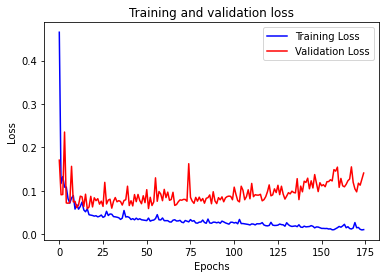

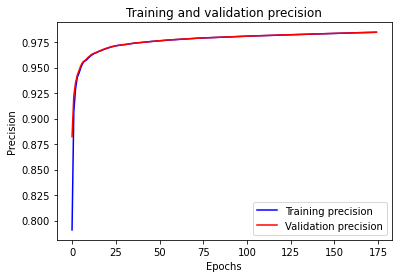

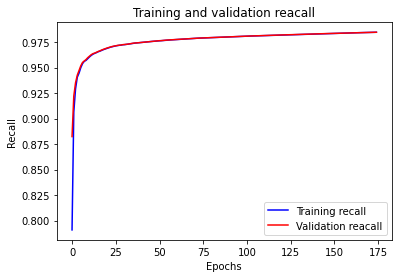

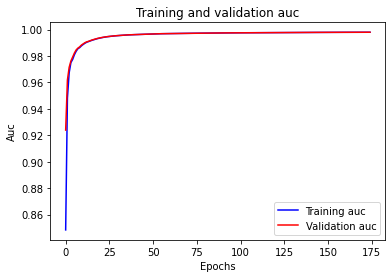

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] 

plt.plot(loss_values, 'b', label = 'Training Loss')
plt.plot(val_loss_values, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png', dpi=500, bbox_inches='tight')

plt.show()

plt.clf()

acc_values = history_dict['precision']
val_acc_values = history_dict['val_precision']

plt.plot(acc_values, 'b', label = 'Training precision')
plt.plot(val_acc_values, 'r', label = 'Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision.png', dpi=500, bbox_inches='tight')
plt.show()


plt.clf()

rec_values = history_dict['recall']
val_rec_values = history_dict['val_recall']

plt.plot(rec_values, 'b', label = 'Training recall')
plt.plot(val_rec_values, 'r', label = 'Validation reacall')
plt.title('Training and validation reacall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.savefig('recall.png', dpi=500, bbox_inches='tight')
plt.show()

plt.clf()

auc_values = history_dict['auc']
val_auc_values = history_dict['val_auc']

plt.plot(auc_values, 'b', label = 'Training auc')
plt.plot(val_auc_values, 'r', label = 'Validation auc')
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('Auc')
plt.legend()
plt.savefig('auc.png', dpi=500, bbox_inches='tight')
plt.show()

In [0]:
loss, accuracy , precision, recall, auc = model.evaluate(X, y)
print("Loss is", loss)
print("Accuracy is", accuracy)
print("precision is", precision)
print("Recall is", recall)
print("AUC is", auc)
print("F1 Score is", (2 * recall * precision) / (recall + precision))

2498/2498 [==============================] - 1s 253us/step
Loss is 0.02768798690964749
Accuracy is 0.9847612977027893
precision is 0.9847612977027893
Recall is 0.9847612977027893
AUC is 0.9980078339576721
F1 Score is 0.9847612977027893


In [0]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model7.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
model.save_weights("my_weights_v7.h5")

In [0]:
!zip /content/drive/My Drive/my_weights_v4.h5.zip my_weights_v4.h5

	zip warning: name not matched: Drive/my_weights_v4.h5.zip
zip I/O error: Operation not supported
zip error: Could not create output file (/content/drive/My.zip)


In [0]:
!gsutil cp -r /content/new/my_weights_v4.h5 /content/drive/My Drive/Machine_Learning

CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
